# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from config import api
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [6]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather"
query = "Nashville"
url_params = {
    "api" : api,
    "q" : query,
    'page': 2
}
city_name = []
Lat = []
Long = []
MaxTemp = []
Humidity = []
Cloundiness = []
WindSpeed = []
Date = []
#enum
for city in cities:
   
    try: 
        # Build partial query URL
        query_url = f"{url}?appid={api}&q={city}"
        #query_url
    

    
        print("City : ",city)
        city_weather = requests.get(query_url).json()
    
    
    
        print(city_weather)
        city_name.append(city_weather['name'])
        Lat.append(city_weather['coord']['lat'])
        Long.append(city_weather['coord']['lon'])
        MaxTemp.append(city_weather['main']['temp_max'])
        Humidity.append(city_weather['main']['humidity'])
        Cloundiness.append(city_weather['clouds']['all'])
        WindSpeed.append(city_weather['wind']['speed'])
      
    except: 
        print("City not found")
    
    time.sleep(1)
print(city_name) 
    

City :  khasan
{'coord': {'lon': 130.64, 'lat': 42.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 277.63, 'feels_like': 269.01, 'temp_min': 277.63, 'temp_max': 277.63, 'pressure': 1012, 'humidity': 65, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 9.18, 'deg': 311}, 'clouds': {'all': 0}, 'dt': 1603457413, 'sys': {'country': 'RU', 'sunrise': 1603402774, 'sunset': 1603441420}, 'timezone': 36000, 'id': 2039557, 'name': 'Khasan', 'cod': 200}
City :  nizhneyansk
{'cod': '404', 'message': 'city not found'}
City not found
City :  chokurdakh
{'coord': {'lon': 147.92, 'lat': 70.63}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 259.66, 'feels_like': 254.67, 'temp_min': 259.66, 'temp_max': 259.66, 'pressure': 1022, 'humidity': 89, 'sea_level': 1022, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'sp

City :  sistranda
{'coord': {'lon': 8.83, 'lat': 63.73}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 280.15, 'feels_like': 276.81, 'temp_min': 280.15, 'temp_max': 280.15, 'pressure': 1003, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1603457434, 'sys': {'type': 1, 'id': 1647, 'country': 'NO', 'sunrise': 1603435099, 'sunset': 1603467558}, 'timezone': 7200, 'id': 3139597, 'name': 'Sistranda', 'cod': 200}
City :  bambous virieux
{'coord': {'lon': 57.76, 'lat': -20.34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 298.94, 'feels_like': 297.61, 'temp_min': 298.71, 'temp_max': 299.15, 'pressure': 1018, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 130}, 'clouds': {'all': 40}, 'dt': 1603457256, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise'

City :  tuktoyaktuk
{'coord': {'lon': -133.04, 'lat': 69.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 270.12, 'feels_like': 263.19, 'temp_min': 270.12, 'temp_max': 270.12, 'pressure': 1030, 'humidity': 97, 'sea_level': 1030, 'grnd_level': 1030}, 'visibility': 2569, 'wind': {'speed': 6.42, 'deg': 293}, 'clouds': {'all': 99}, 'dt': 1603457454, 'sys': {'country': 'CA', 'sunrise': 1603471130, 'sunset': 1603499619}, 'timezone': -21600, 'id': 6170031, 'name': 'Tuktoyaktuk', 'cod': 200}
City :  naron
{'coord': {'lon': -8.15, 'lat': 43.52}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 290.49, 'feels_like': 287.03, 'temp_min': 290.15, 'temp_max': 290.93, 'pressure': 1021, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1603457455, 'sys': {'type': 1, 'id': 6403, 'country'

{'coord': {'lon': -23.71, 'lat': 64.89}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 279.34, 'feels_like': 266.45, 'temp_min': 279.34, 'temp_max': 279.34, 'pressure': 981, 'humidity': 66, 'sea_level': 981, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 15.64, 'deg': 61}, 'rain': {'1h': 2.734}, 'clouds': {'all': 100}, 'dt': 1603457471, 'sys': {'country': 'IS', 'sunrise': 1603443234, 'sunset': 1603475041}, 'timezone': 0, 'id': 3414079, 'name': 'Olafsvik', 'cod': 200}
City :  punta arenas
{'coord': {'lon': -70.92, 'lat': -53.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 279.98, 'feels_like': 277.15, 'temp_min': 279.82, 'temp_max': 280.15, 'pressure': 1012, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1603457450, 'sys': {'type': 1, 'id': 8487, 'country': 

City :  banyo
{'coord': {'lon': 11.82, 'lat': 6.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.44, 'feels_like': 300.35, 'temp_min': 301.44, 'temp_max': 301.44, 'pressure': 1009, 'humidity': 45, 'sea_level': 1009, 'grnd_level': 895}, 'visibility': 10000, 'wind': {'speed': 3.97, 'deg': 81}, 'clouds': {'all': 62}, 'dt': 1603457491, 'sys': {'country': 'CM', 'sunrise': 1603429139, 'sunset': 1603472084}, 'timezone': 3600, 'id': 2234794, 'name': 'Banyo', 'cod': 200}
City :  dikson
{'coord': {'lon': 80.55, 'lat': 73.51}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 268.45, 'feels_like': 261.06, 'temp_min': 268.45, 'temp_max': 268.45, 'pressure': 1003, 'humidity': 94, 'sea_level': 1003, 'grnd_level': 997}, 'visibility': 4747, 'wind': {'speed': 6.75, 'deg': 44}, 'clouds': {'all': 100}, 'dt': 1603457492, 'sys': {'country': 

City :  bethel
{'coord': {'lon': -73.41, 'lat': 41.37}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 290.12, 'feels_like': 290.55, 'temp_min': 289.82, 'temp_max': 290.37, 'pressure': 1022, 'humidity': 96}, 'visibility': 10000, 'wind': {'speed': 2.41, 'deg': 128}, 'clouds': {'all': 100}, 'dt': 1603457509, 'sys': {'type': 3, 'id': 2004826, 'country': 'US', 'sunrise': 1603451696, 'sunset': 1603490433}, 'timezone': -14400, 'id': 5282297, 'name': 'Bethel', 'cod': 200}
City :  pevek
{'coord': {'lon': 170.31, 'lat': 69.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 270.53, 'feels_like': 264.41, 'temp_min': 270.53, 'temp_max': 270.53, 'pressure': 1024, 'humidity': 95, 'sea_level': 1024, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 5.28, 'deg': 153}, 'clouds': {'all': 0}, 'dt': 1603457510, 'sys': {'country': 'RU', 'su

City :  ushuaia
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 279.15, 'feels_like': 273.74, 'temp_min': 279.15, 'temp_max': 279.15, 'pressure': 1011, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1603457526, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1603443798, 'sunset': 1603495879}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
City :  orissaare
{'coord': {'lon': 23.08, 'lat': 58.56}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 283.04, 'feels_like': 279.9, 'temp_min': 282.15, 'temp_max': 283.71, 'pressure': 1001, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 290}, 'clouds': {'all': 90}, 'dt': 1603457527, 'sys': {'type': 1, 'id': 1328, 'country': 'EE', 'sunrise': 1

City :  tumannyy
{'cod': '404', 'message': 'city not found'}
City not found
City :  benguela
{'coord': {'lon': 13.41, 'lat': -12.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 301.15, 'feels_like': 304.53, 'temp_min': 301.15, 'temp_max': 301.15, 'pressure': 1011, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 270}, 'clouds': {'all': 40}, 'dt': 1603457544, 'sys': {'type': 1, 'id': 9743, 'country': 'AO', 'sunrise': 1603427794, 'sunset': 1603472666}, 'timezone': 3600, 'id': 3351663, 'name': 'Benguela', 'cod': 200}
City :  inhambane
{'coord': {'lon': 35.38, 'lat': -23.86}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 302.09, 'feels_like': 300.05, 'temp_min': 302.04, 'temp_max': 302.15, 'pressure': 1017, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 90}, 'clouds': {'all': 40},

City :  katsuura
{'coord': {'lon': 140.3, 'lat': 35.13}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.98, 'feels_like': 290.38, 'temp_min': 290.93, 'temp_max': 291.15, 'pressure': 1001, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1603457562, 'sys': {'type': 1, 'id': 8074, 'country': 'JP', 'sunrise': 1603399890, 'sunset': 1603439668}, 'timezone': 32400, 'id': 2112309, 'name': 'Katsuura', 'cod': 200}
City :  suntar
{'coord': {'lon': 117.63, 'lat': 62.14}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 276.09, 'feels_like': 271.61, 'temp_min': 276.09, 'temp_max': 276.09, 'pressure': 1009, 'humidity': 88, 'sea_level': 1009, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 3.81, 'deg': 222}, 'clouds': {'all': 93}, 'dt': 1603457563, 'sys': {'country': 'RU',

City :  nemuro
{'coord': {'lon': 145.57, 'lat': 43.32}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 288.38, 'feels_like': 284.9, 'temp_min': 288.38, 'temp_max': 288.38, 'pressure': 994, 'humidity': 96, 'sea_level': 994, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 7.08, 'deg': 213}, 'clouds': {'all': 100}, 'dt': 1603457582, 'sys': {'country': 'JP', 'sunrise': 1603399265, 'sunset': 1603437763}, 'timezone': 32400, 'id': 2128975, 'name': 'Nemuro', 'cod': 200}
City :  atar
{'coord': {'lon': -13.05, 'lat': 20.52}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 309.16, 'feels_like': 304.46, 'temp_min': 309.16, 'temp_max': 309.16, 'pressure': 1014, 'humidity': 13, 'sea_level': 1014, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 92}, 'clouds': {'all': 92}, 'dt': 1603457304, 'sys': {'count

City :  barrow
{'coord': {'lon': -156.79, 'lat': 71.29}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 273.15, 'feels_like': 267.55, 'temp_min': 273.15, 'temp_max': 273.15, 'pressure': 1029, 'humidity': 98}, 'visibility': 402, 'wind': {'speed': 5.1, 'deg': 220}, 'clouds': {'all': 90}, 'dt': 1603457600, 'sys': {'type': 1, 'id': 7649, 'country': 'US', 'sunrise': 1603477747, 'sunset': 1603504401}, 'timezone': -28800, 'id': 5880054, 'name': 'Barrow', 'cod': 200}
City :  kruisfontein
{'coord': {'lon': 24.73, 'lat': -34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.59, 'feels_like': 296.9, 'temp_min': 297.59, 'temp_max': 297.59, 'pressure': 1011, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 4.92, 'deg': 174, 'gust': 8.94}, 'clouds': {'all': 0}, 'dt': 1603457602, 'sys': {'type': 3, 'id': 2035063, 'country': 'ZA', 'sunrise': 16034237

City :  palomares
{'coord': {'lon': -95.07, 'lat': 17.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 295.26, 'feels_like': 299.01, 'temp_min': 295.26, 'temp_max': 295.26, 'pressure': 1013, 'humidity': 91, 'sea_level': 1013, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 0.32, 'deg': 287}, 'clouds': {'all': 73}, 'dt': 1603457618, 'sys': {'country': 'MX', 'sunrise': 1603455325, 'sunset': 1603497200}, 'timezone': -18000, 'id': 3522013, 'name': 'Palomares', 'cod': 200}
City :  hasaki
{'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.02, 'feels_like': 289.83, 'temp_min': 289.15, 'temp_max': 290.37, 'pressure': 1001, 'humidity': 100}, 'visibility': 8000, 'wind': {'speed': 3.6, 'deg': 10}, 'clouds': {'all': 75}, 'dt': 1603457619, 'sys': {'type': 1, 'id': 7955, 'country': 'JP

City :  coihueco
{'coord': {'lon': -71.83, 'lat': -36.62}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 283.54, 'feels_like': 281.52, 'temp_min': 281.15, 'temp_max': 285.93, 'pressure': 1016, 'humidity': 100}, 'visibility': 1000, 'wind': {'speed': 3.1, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1603457637, 'sys': {'type': 1, 'id': 8483, 'country': 'CL', 'sunrise': 1603446717, 'sunset': 1603494654}, 'timezone': -10800, 'id': 3894406, 'name': 'Coihueco', 'cod': 200}
City :  isla mujeres
{'coord': {'lon': -86.73, 'lat': 21.23}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 298.15, 'feels_like': 303.42, 'temp_min': 298.15, 'temp_max': 298.15, 'pressure': 1010, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 1.65, 'deg': 268}, 'clouds': {'all': 75}, 'dt': 1603457638, 'sys': {'type': 1, 'id': 7177, 'country': 'MX', 'sunrise': 160345

City :  svetlaya
{'coord': {'lon': 138.33, 'lat': 46.54}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 276.5, 'feels_like': 269.96, 'temp_min': 276.5, 'temp_max': 276.5, 'pressure': 983, 'humidity': 77, 'sea_level': 983, 'grnd_level': 983}, 'visibility': 6848, 'wind': {'speed': 6.44, 'deg': 269}, 'clouds': {'all': 100}, 'dt': 1603457655, 'sys': {'country': 'RU', 'sunrise': 1603401305, 'sunset': 1603439198}, 'timezone': 36000, 'id': 2015852, 'name': 'Svetlaya', 'cod': 200}
City :  haapiti
{'coord': {'lon': -149.87, 'lat': -17.57}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.03, 'feels_like': 299.41, 'temp_min': 295.93, 'temp_max': 296.15, 'pressure': 1011, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1603457656, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sun

City :  cockburn town
{'coord': {'lon': -71.14, 'lat': 21.46}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 301.34, 'feels_like': 301.71, 'temp_min': 301.34, 'temp_max': 301.34, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 7.59, 'deg': 125}, 'clouds': {'all': 45}, 'dt': 1603457672, 'sys': {'country': 'TC', 'sunrise': 1603449815, 'sunset': 1603491225}, 'timezone': -14400, 'id': 3576994, 'name': 'Cockburn Town', 'cod': 200}
City :  pedernales
{'coord': {'lon': -71.74, 'lat': 18.04}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.15, 'feels_like': 301.32, 'temp_min': 297.15, 'temp_max': 297.15, 'pressure': 1014, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 2.35, 'deg': 121}, 'clouds': {'all': 75}, 'dt': 1603457673, 'sys': {'type': 1, 'id': 70

City :  namibe
{'coord': {'lon': 12.15, 'lat': -15.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 302.15, 'feels_like': 300.05, 'temp_min': 302.15, 'temp_max': 302.15, 'pressure': 1010, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 8.2, 'deg': 270}, 'clouds': {'all': 40}, 'dt': 1603457649, 'sys': {'type': 1, 'id': 2155, 'country': 'AO', 'sunrise': 1603427957, 'sunset': 1603473107}, 'timezone': 3600, 'id': 3347019, 'name': 'Mossamedes', 'cod': 200}
City :  east london
{'coord': {'lon': 27.91, 'lat': -33.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.15, 'feels_like': 299.43, 'temp_min': 300.15, 'temp_max': 300.15, 'pressure': 1011, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1603457690, 'sys': {'type': 1, 'id': 1912, 'country': 'ZA', 'sunrise': 160342

City :  esperance
{'coord': {'lon': 121.9, 'lat': -33.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.15, 'feels_like': 283.22, 'temp_min': 286.15, 'temp_max': 286.15, 'pressure': 1021, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1603457707, 'sys': {'type': 1, 'id': 9525, 'country': 'AU', 'sunrise': 1603400473, 'sunset': 1603447916}, 'timezone': 28800, 'id': 2071860, 'name': 'Esperance', 'cod': 200}
City :  okhotsk
{'coord': {'lon': 143.3, 'lat': 59.38}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 275.97, 'feels_like': 270.39, 'temp_min': 275.97, 'temp_max': 275.97, 'pressure': 1019, 'humidity': 91, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 5.47, 'deg': 37}, 'rain': {'1h': 1.12}, 'clouds': {'all': 100}, 'dt': 1603457708, '

City :  nome
{'coord': {'lon': -165.41, 'lat': 64.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 273.93, 'feels_like': 267.15, 'temp_min': 273.15, 'temp_max': 275.15, 'pressure': 1020, 'humidity': 37}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 70}, 'clouds': {'all': 1}, 'dt': 1603457723, 'sys': {'type': 1, 'id': 7770, 'country': 'US', 'sunrise': 1603477210, 'sunset': 1603509075}, 'timezone': -28800, 'id': 5870133, 'name': 'Nome', 'cod': 200}
City :  alta floresta
{'coord': {'lon': -56.09, 'lat': -9.88}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 305.09, 'feels_like': 308.92, 'temp_min': 305.09, 'temp_max': 305.09, 'pressure': 1013, 'humidity': 54, 'sea_level': 1013, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 0.83, 'deg': 354}, 'clouds': {'all': 100}, 'dt': 1603457724, 'sys': {'country': 'BR', 'sun

City :  chuchkovo
{'coord': {'lon': 41.45, 'lat': 54.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 285.2, 'feels_like': 280.7, 'temp_min': 285.2, 'temp_max': 285.2, 'pressure': 1009, 'humidity': 80, 'sea_level': 1009, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 6.01, 'deg': 255}, 'clouds': {'all': 5}, 'dt': 1603457741, 'sys': {'country': 'RU', 'sunrise': 1603425489, 'sunset': 1603461512}, 'timezone': 10800, 'id': 567806, 'name': 'Chuchkovo', 'cod': 200}
City :  dutlwe
{'coord': {'lon': 23.9, 'lat': -23.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 307.75, 'feels_like': 303.27, 'temp_min': 307.75, 'temp_max': 307.75, 'pressure': 1013, 'humidity': 14, 'sea_level': 1013, 'grnd_level': 897}, 'visibility': 10000, 'wind': {'speed': 4.3, 'deg': 54}, 'clouds': {'all': 0}, 'dt': 1603457743, 'sys': {'country': 'BW', 'su

City :  coquimbo
{'coord': {'lon': -71.34, 'lat': -29.95}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 284.15, 'feels_like': 282.3, 'temp_min': 284.15, 'temp_max': 284.15, 'pressure': 1017, 'humidity': 100}, 'visibility': 5000, 'wind': {'speed': 3.1, 'deg': 290}, 'clouds': {'all': 90}, 'dt': 1603457658, 'sys': {'type': 1, 'id': 8514, 'country': 'CL', 'sunrise': 1603447097, 'sunset': 1603494039}, 'timezone': -10800, 'id': 3893629, 'name': 'Coquimbo', 'cod': 200}
City :  safaga
{'coord': {'lon': 33.94, 'lat': 26.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 307.15, 'feels_like': 306.58, 'temp_min': 307.15, 'temp_max': 307.15, 'pressure': 1012, 'humidity': 34}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1603457760, 'sys': {'type': 1, 'id': 2513, 'country': 'EG', 'sunrise': 1

City :  constantine
{'coord': {'lon': 6.61, 'lat': 36.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.15, 'feels_like': 298.32, 'temp_min': 300.15, 'temp_max': 300.15, 'pressure': 1023, 'humidity': 34}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1603457701, 'sys': {'type': 1, 'id': 1074, 'country': 'DZ', 'sunrise': 1603432085, 'sunset': 1603471638}, 'timezone': 3600, 'id': 2501152, 'name': 'Constantine', 'cod': 200}
City :  sholapur
{'coord': {'lon': 75.92, 'lat': 17.68}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 302.32, 'feels_like': 305.11, 'temp_min': 302.32, 'temp_max': 302.32, 'pressure': 1007, 'humidity': 60, 'sea_level': 1007, 'grnd_level': 955}, 'visibility': 10000, 'wind': {'speed': 1.71, 'deg': 76}, 'clouds': {'all': 95}, 'dt': 1603457778, 'sys': {'country': 'IN', 's

City :  port blair
{'coord': {'lon': 92.75, 'lat': 11.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.97, 'feels_like': 305.44, 'temp_min': 300.97, 'temp_max': 300.97, 'pressure': 1008, 'humidity': 81, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.14, 'deg': 244}, 'clouds': {'all': 100}, 'dt': 1603457797, 'sys': {'country': 'IN', 'sunrise': 1603409959, 'sunset': 1603452421}, 'timezone': 19800, 'id': 1259385, 'name': 'Port Blair', 'cod': 200}
City :  bulungu
{'coord': {'lon': 18.6, 'lat': -4.55}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 300.74, 'feels_like': 306.06, 'temp_min': 300.74, 'temp_max': 300.74, 'pressure': 1008, 'humidity': 83, 'sea_level': 1008, 'grnd_level': 960}, 'visibility': 10000, 'wind': {'speed': 1.08, 'deg': 166}, 'rain': {'1h': 2.25}, 'clouds': {'all': 87}, '

City :  balsas
{'coord': {'lon': -46.04, 'lat': -7.53}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 306.54, 'feels_like': 306.51, 'temp_min': 306.54, 'temp_max': 306.54, 'pressure': 1012, 'humidity': 39, 'sea_level': 1012, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 3.74, 'deg': 56}, 'rain': {'1h': 1.538}, 'clouds': {'all': 90}, 'dt': 1603457817, 'sys': {'country': 'BR', 'sunrise': 1603442318, 'sunset': 1603486675}, 'timezone': -10800, 'id': 3406545, 'name': 'Balsas', 'cod': 200}
City :  kavieng
{'coord': {'lon': 150.8, 'lat': -2.57}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 301.21, 'feels_like': 302.9, 'temp_min': 301.21, 'temp_max': 301.21, 'pressure': 1010, 'humidity': 67, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.82, 'deg': 68}, 'clouds': {'all': 12}, 'dt': 16034578

City :  shingu
{'coord': {'lon': 135.98, 'lat': 33.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 286.51, 'feels_like': 283.51, 'temp_min': 286.51, 'temp_max': 286.51, 'pressure': 1007, 'humidity': 72, 'sea_level': 1007, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 3.76, 'deg': 303}, 'clouds': {'all': 0}, 'dt': 1603457835, 'sys': {'country': 'JP', 'sunrise': 1603400831, 'sunset': 1603440800}, 'timezone': 32400, 'id': 1847947, 'name': 'Shingū', 'cod': 200}
City :  mackenzie
{'coord': {'lon': -123.17, 'lat': 55.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 266.15, 'feels_like': 259.85, 'temp_min': 266.15, 'temp_max': 266.15, 'pressure': 1027, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 40, 'gust': 10.3}, 'clouds': {'all': 90}, 'dt': 1603457836, 'sys': {'type': 1, 'id': 1016, 'country'

City :  laguna
{'coord': {'lon': -121.42, 'lat': 38.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.61, 'feels_like': 280.38, 'temp_min': 282.59, 'temp_max': 285.37, 'pressure': 1012, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 328}, 'clouds': {'all': 1}, 'dt': 1603457853, 'sys': {'type': 1, 'id': 5769, 'country': 'US', 'sunrise': 1603462988, 'sunset': 1603502184}, 'timezone': -25200, 'id': 5364271, 'name': 'Laguna', 'cod': 200}
City :  golyshmanovo
{'coord': {'lon': 68.37, 'lat': 56.4}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 269.48, 'feels_like': 263.8, 'temp_min': 269.48, 'temp_max': 269.48, 'pressure': 1018, 'humidity': 92, 'sea_level': 1018, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 4.42, 'deg': 308}, 'clouds': {'all': 93}, 'dt': 1603457854, 'sys': {'country': 'RU', '

City :  bima
{'coord': {'lon': 118.72, 'lat': -8.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.23, 'feels_like': 302.93, 'temp_min': 299.23, 'temp_max': 299.23, 'pressure': 1011, 'humidity': 83, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.18, 'deg': 186}, 'clouds': {'all': 2}, 'dt': 1603457869, 'sys': {'country': 'ID', 'sunrise': 1603402737, 'sunset': 1603447178}, 'timezone': 28800, 'id': 1648759, 'name': 'Bima', 'cod': 200}
City :  beloha
{'coord': {'lon': 45.05, 'lat': -25.17}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 303.12, 'feels_like': 298.57, 'temp_min': 303.12, 'temp_max': 303.12, 'pressure': 1014, 'humidity': 45, 'sea_level': 1014, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 9.74, 'deg': 118}, 'clouds': {'all': 100}, 'dt': 1603457871, 'sys': {'country': 

City :  maneadero
{'coord': {'lon': -116.57, 'lat': 31.72}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.26, 'feels_like': 288.76, 'temp_min': 289.26, 'temp_max': 289.26, 'pressure': 1013, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 171, 'gust': 2.68}, 'clouds': {'all': 95}, 'dt': 1603457886, 'sys': {'type': 3, 'id': 2001695, 'country': 'MX', 'sunrise': 1603461342, 'sunset': 1603501502}, 'timezone': -25200, 'id': 3996737, 'name': 'Rodolfo Sánchez Taboada', 'cod': 200}
City :  colesberg
{'coord': {'lon': 25.1, 'lat': -30.72}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 307.57, 'feels_like': 300.91, 'temp_min': 307.57, 'temp_max': 307.57, 'pressure': 1012, 'humidity': 12, 'sea_level': 1012, 'grnd_level': 869}, 'visibility': 10000, 'wind': {'speed': 6.87, 'deg': 296}, 'clouds': {'all': 99}, '

City :  nguiu
{'cod': '404', 'message': 'city not found'}
City not found
City :  lufilufi
{'coord': {'lon': -171.6, 'lat': -13.87}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 297.15, 'feels_like': 298.8, 'temp_min': 297.15, 'temp_max': 297.15, 'pressure': 1010, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 5.96, 'deg': 127}, 'clouds': {'all': 40}, 'dt': 1603457904, 'sys': {'type': 1, 'id': 7315, 'country': 'WS', 'sunrise': 1603558485, 'sunset': 1603603558}, 'timezone': 50400, 'id': 4035249, 'name': 'Lufilufi', 'cod': 200}
City :  ondjiva
{'coord': {'lon': 15.73, 'lat': -17.07}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 307.15, 'feels_like': 305.18, 'temp_min': 307.15, 'temp_max': 307.15, 'pressure': 1016, 'humidity': 24}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 150}, 'clouds': {'all': 0}, 'dt': 160

City :  biak
{'coord': {'lon': 122.88, 'lat': -0.91}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 298.84, 'feels_like': 303.22, 'temp_min': 298.84, 'temp_max': 298.84, 'pressure': 1011, 'humidity': 81, 'sea_level': 1011, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 0.59, 'deg': 123}, 'clouds': {'all': 17}, 'dt': 1603457922, 'sys': {'country': 'ID', 'sunrise': 1603402112, 'sunset': 1603445807}, 'timezone': 28800, 'id': 1637001, 'name': 'Biak', 'cod': 200}
City :  hellin
{'coord': {'lon': -1.7, 'lat': 38.51}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 290.96, 'feels_like': 285.96, 'temp_min': 289.15, 'temp_max': 292.59, 'pressure': 1023, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 280}, 'clouds': {'all': 40}, 'dt': 1603457923, 'sys': {'type': 1, 'id': 6390, 'country': 'ES', 'sunrise':

City :  isangel
{'coord': {'lon': 169.27, 'lat': -19.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.57, 'feels_like': 294.4, 'temp_min': 296.57, 'temp_max': 296.57, 'pressure': 1015, 'humidity': 78, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 7.95, 'deg': 75}, 'clouds': {'all': 100}, 'dt': 1603457942, 'sys': {'country': 'VU', 'sunrise': 1603390025, 'sunset': 1603435628}, 'timezone': 39600, 'id': 2136825, 'name': 'Isangel', 'cod': 200}
City :  bisho
{'coord': {'lon': 27.44, 'lat': -32.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.15, 'feels_like': 299.43, 'temp_min': 300.15, 'temp_max': 300.15, 'pressure': 1011, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1603457943, 'sys': {'type': 1, 'id': 1912, 'country': 'ZA', 'sunris

City :  morant bay
{'coord': {'lon': -76.41, 'lat': 17.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.1, 'feels_like': 300.48, 'temp_min': 297.04, 'temp_max': 297.15, 'pressure': 1012, 'humidity': 94}, 'visibility': 1000, 'wind': {'speed': 2.6, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1603457961, 'sys': {'type': 1, 'id': 7105, 'country': 'JM', 'sunrise': 1603450885, 'sunset': 1603492685}, 'timezone': -18000, 'id': 3489440, 'name': 'Morant Bay', 'cod': 200}
City :  tamworth
{'coord': {'lon': -1.7, 'lat': 52.63}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 284.81, 'feels_like': 282.22, 'temp_min': 284.26, 'temp_max': 285.37, 'pressure': 1005, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 200}, 'clouds': {'all': 75}, 'dt': 1603457758, 'sys': {'type': 1, 'id': 1375, 'country': 'GB', 'sunrise': 16

City :  hokitika
{'coord': {'lon': 170.97, 'lat': -42.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 282.12, 'feels_like': 280.27, 'temp_min': 282.12, 'temp_max': 282.12, 'pressure': 1024, 'humidity': 89, 'sea_level': 1024, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 1.73, 'deg': 103}, 'clouds': {'all': 78}, 'dt': 1603457978, 'sys': {'country': 'NZ', 'sunrise': 1603474272, 'sunset': 1603523350}, 'timezone': 46800, 'id': 2206894, 'name': 'Hokitika', 'cod': 200}
City :  burica
{'cod': '404', 'message': 'city not found'}
City not found
City :  bandarbeyla
{'coord': {'lon': 50.81, 'lat': 9.49}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.1, 'feels_like': 301.51, 'temp_min': 300.1, 'temp_max': 300.1, 'pressure': 1007, 'humidity': 72, 'sea_level': 1007, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed'

City :  norman wells
{'coord': {'lon': -126.83, 'lat': 65.28}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 265.15, 'feels_like': 261.47, 'temp_min': 265.15, 'temp_max': 265.15, 'pressure': 1034, 'humidity': 92}, 'visibility': 4828, 'wind': {'speed': 1, 'deg': 60}, 'clouds': {'all': 90}, 'dt': 1603458001, 'sys': {'type': 1, 'id': 951, 'country': 'CA', 'sunrise': 1603468151, 'sunset': 1603499618}, 'timezone': -21600, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}
City :  wonthaggi
{'coord': {'lon': 145.59, 'lat': -38.6}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 288.66, 'feels_like': 289.31, 'temp_min': 288.15, 'temp_max': 289.82, 'pressure': 1002, 'humidity': 93}, 'visibility': 4796, 'wind': {'speed': 1.06, 'deg': 86}, 'rain': {'1h': 0.37}, 'clouds': {'all': 100}, 'dt': 1603457980, 'sys': {'type': 3, 'id': 2004514, 'country':

City :  ossora
{'coord': {'lon': 163.07, 'lat': 59.24}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 276.01, 'feels_like': 272.76, 'temp_min': 276.01, 'temp_max': 276.01, 'pressure': 1028, 'humidity': 80, 'sea_level': 1028, 'grnd_level': 1027}, 'visibility': 10000, 'wind': {'speed': 1.76, 'deg': 305}, 'clouds': {'all': 0}, 'dt': 1603458023, 'sys': {'country': 'RU', 'sunrise': 1603483594, 'sunset': 1603517820}, 'timezone': 43200, 'id': 2122389, 'name': 'Ossora', 'cod': 200}
City :  vargashi
{'coord': {'lon': 65.85, 'lat': 55.36}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 269.61, 'feels_like': 264.74, 'temp_min': 269.61, 'temp_max': 269.61, 'pressure': 1020, 'humidity': 88, 'sea_level': 1020, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 3.2, 'deg': 296}, 'clouds': {'all': 63}, 'dt': 1603458024, 'sys': {'country'

City :  olinda
{'coord': {'lon': -34.86, 'lat': -8.01}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.15, 'feels_like': 303.03, 'temp_min': 302.15, 'temp_max': 302.15, 'pressure': 1015, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1603458045, 'sys': {'type': 1, 'id': 8426, 'country': 'BR', 'sunrise': 1603439611, 'sunset': 1603484016}, 'timezone': -10800, 'id': 3393536, 'name': 'Olinda', 'cod': 200}
City :  kaseda
{'coord': {'lon': 130.32, 'lat': 31.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 284.98, 'feels_like': 282.63, 'temp_min': 284.82, 'temp_max': 285.15, 'pressure': 1013, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1603458046, 'sys': {'type': 1, 'id': 7999, 'country': 'JP', 'sunrise': 1603402037, 's

City :  coracora
{'coord': {'lon': -73.78, 'lat': -15.03}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 287.93, 'feels_like': 285.1, 'temp_min': 287.93, 'temp_max': 287.93, 'pressure': 1018, 'humidity': 36, 'sea_level': 1018, 'grnd_level': 701}, 'visibility': 10000, 'wind': {'speed': 1.18, 'deg': 200}, 'clouds': {'all': 13}, 'dt': 1603458065, 'sys': {'country': 'PE', 'sunrise': 1603448582, 'sunset': 1603493725}, 'timezone': -18000, 'id': 3942259, 'name': 'Coracora', 'cod': 200}
City :  honningsvag
{'coord': {'lon': 25.97, 'lat': 70.98}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 277.15, 'feels_like': 265.38, 'temp_min': 277.15, 'temp_max': 277.15, 'pressure': 994, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 14.4, 'deg': 60, 'gust': 20.1}, 'rain': {'1h': 0.65}, 'clouds': {'all': 75}, 'dt': 1603458066, 'sys': {'type

City :  laredo
{'coord': {'lon': -99.51, 'lat': 27.51}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 298.15, 'feels_like': 299.58, 'temp_min': 298.15, 'temp_max': 298.15, 'pressure': 1012, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 160}, 'clouds': {'all': 90}, 'dt': 1603458025, 'sys': {'type': 1, 'id': 4756, 'country': 'US', 'sunrise': 1603456978, 'sunset': 1603497678}, 'timezone': -18000, 'id': 4705349, 'name': 'Laredo', 'cod': 200}
City :  pingliang
{'coord': {'lon': 106.69, 'lat': 35.54}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.74, 'feels_like': 278.19, 'temp_min': 281.74, 'temp_max': 281.74, 'pressure': 1017, 'humidity': 54, 'sea_level': 1017, 'grnd_level': 866}, 'visibility': 10000, 'wind': {'speed': 2.19, 'deg': 179}, 'clouds': {'all': 92}, 'dt': 1603458086, 'sys': {'country': 'C

In [16]:
# Get data from csv file
data = requests.get(query_url).json()
data




{'coord': {'lon': 45.34, 'lat': 2.04},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 302.15,
  'feels_like': 302.16,
  'temp_min': 302.15,
  'temp_max': 302.15,
  'pressure': 1008,
  'humidity': 66},
 'visibility': 10000,
 'wind': {'speed': 6.7, 'deg': 210},
 'clouds': {'all': 40},
 'dt': 1603465705,
 'sys': {'type': 1,
  'id': 2497,
  'country': 'SO',
  'sunrise': 1603420864,
  'sunset': 1603464271},
 'timezone': 10800,
 'id': 53654,
 'name': 'Mogadishu',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
#Create DF
city_weather_df = pd.DataFrame({
    'city' : city_name,
    'Lat' : Lat,
    'Long' :Long,
    'MaxTemp' : MaxTemp,
    'Humidity' : Humidity,
    'Cloundiness' : Cloundiness,
    'Wind Speed' : WindSpeed 
})


city_weather_df
city_weather_df.to_csv(index=False)
   


"city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed\r\nKhasan,42.43,130.64,277.63,65,0,9.18\r\nChokurdakh,70.63,147.92,259.66,89,66,2.32\r\nPuerto Ayora,-0.74,-90.35,292.04,96,100,1.79\r\nHobart,-42.88,147.33,285.37,76,75,2.1\r\nAirai,-8.93,125.41,291.22,100,67,0.55\r\nJamestown,42.1,-79.24,287.59,93,20,3.1\r\nTaldan,53.67,124.8,268.22,93,0,1.49\r\nBredasdorp,-34.53,20.04,298.15,61,75,5.1\r\nSão Filipe,14.9,-24.5,300.89,70,2,4.04\r\nClyde River,70.47,-68.59,265.15,85,90,1.0\r\nDurham,36.03,-78.87,289.82,100,75,1.2\r\nMar del Plata,-38.0,-57.56,287.15,100,90,1.5\r\nBusselton,-33.65,115.33,287.04,47,0,6.22\r\nKropotkin,45.44,40.58,292.85,45,98,2.57\r\nKattivākkam,13.22,80.32,304.15,74,75,2.1\r\nSistranda,63.73,8.83,280.15,75,40,2.6\r\nBambous Virieux,-20.34,57.76,299.15,61,40,5.7\r\nTegul'det,57.31,88.17,273.58,93,83,3.21\r\nKaitangata,-46.28,169.85,283.77,89,100,1.23\r\nRikitea,-23.12,-134.97,296.49,79,41,1.48\r\nHamilton,39.18,-84.53,292.04,82,75,3.6\r\nPort Alfred,-33.59,26.89,298.

In [27]:
#export to csv
#city_weather_df = city_weather_df.to_csv("cities.csv")
city_weather_df

,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed
0,Khasan,42.43,130.64,277.63,65,0,9.18
1,Chokurdakh,70.63,147.92,259.66,89,66,2.32
2,Puerto Ayora,-0.74,-90.35,292.04,96,100,1.79
3,Hobart,-42.88,147.33,285.37,76,75,2.10
4,Airai,-8.93,125.41,291.22,100,67,0.55
...,...,...,...,...,...,...,...
541,Thunder Bay,48.40,-89.32,274.15,80,90,1.50
542,Ambilobe,-13.20,49.05,304.65,38,98,1.33
543,Dukat,62.55,155.55,265.94,86,2,2.91
544,Bafoulabé,13.81,-10.83,312.03,18,0,1.34


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
#  Get the indices of cities that have humidity over 100%.
#city_weather_df.drop(['Humidity'], >= 100)

# CREATE INDEX
index_names = city_weather_df[city_weather_df['Humidity'] > 100 ].index 
# drop these row indexes 
# from dataFrame 
city_clean_data = city_weather_df.drop(index_names, inplace = False) 
  
city_clean_data
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed
0,Khasan,42.43,130.64,277.63,65,0,9.18
1,Chokurdakh,70.63,147.92,259.66,89,66,2.32
2,Puerto Ayora,-0.74,-90.35,292.04,96,100,1.79
3,Hobart,-42.88,147.33,285.37,76,75,2.10
4,Airai,-8.93,125.41,291.22,100,67,0.55
...,...,...,...,...,...,...,...
541,Thunder Bay,48.40,-89.32,274.15,80,90,1.50
542,Ambilobe,-13.20,49.05,304.65,38,98,1.33
543,Dukat,62.55,155.55,265.94,86,2,2.91
544,Bafoulabé,13.81,-10.83,312.03,18,0,1.34


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

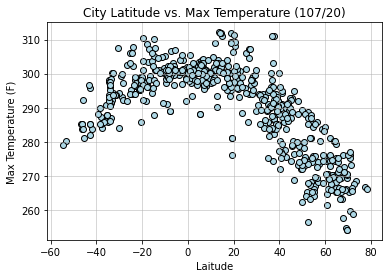

In [29]:

# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["MaxTemp"], facecolor = "lightblue", edgecolor = "black")

# Set title/
plt.title("City Latitude vs. Max Temperature (107/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

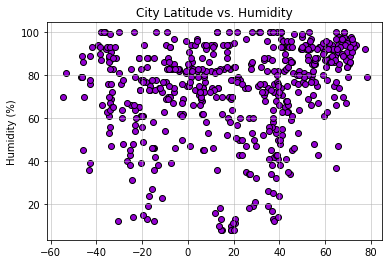

In [30]:
# Create Latitude vs. Humnidity Plot scatter plot
plt.scatter(city_clean_data["Lat"],city_clean_data["Humidity"], facecolor = "darkviolet", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Humidity")

# Set xX.xlabel("Laitude")

# Y axis label
plt.ylabel("Humidity (%)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

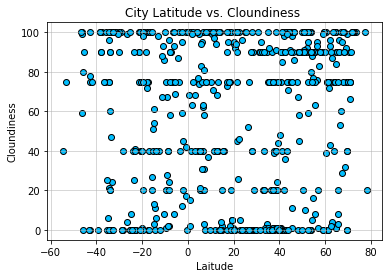

In [31]:
# Create Latitude vs. Cloundiness Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["Cloundiness"], facecolor = "deepskyblue", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Cloundiness ")

#X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Cloundiness")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

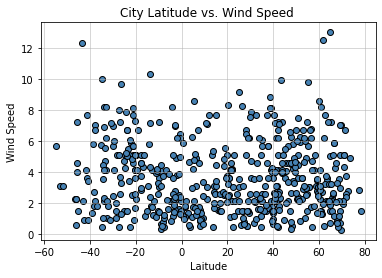

In [306]:
# Create Latitude vs. Wind Speed Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Wind Speed ")

#X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Wind Speed")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Wind.png")

## Linear Regression

In [291]:
#Define North and south
north = city_clean_data.loc[city_weather_df['Lat'] >= 0]
south = city_clean_data.loc[city_weather_df['Lat'] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [300]:
# Perform a linear regression on temperature vs. latitude
x_values = north['MaxTemp']
y_values = north['Lat']
#city_clean_data.loc[:,("MaxTemp", 'Lat')]
# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress Temp'] = regress_values

north

-1.3424701620591721 423.3633226802769 -0.8592746241052742


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress Temp,regress hum
0,Upernavik,72.79,-56.15,269.75,95,88,2.77,61.231996,46.138425
5,Basco,20.45,121.97,302.05,84,100,8.34,17.870210,42.963891
7,Ashcroft,50.72,-121.29,282.15,48,75,3.60,44.585366,32.574507
8,Yumen,40.28,97.20,274.76,70,0,2.65,54.506221,38.923575
9,Pevek,69.70,170.31,271.90,99,95,0.25,58.345686,47.292801
...,...,...,...,...,...,...,...,...,...
534,Greencastle,39.64,-86.86,289.82,82,90,0.81,34.288620,42.386703
536,Naze,28.37,129.48,299.15,88,75,5.10,21.763374,44.118267
537,Panjāb,34.39,67.02,270.90,77,0,2.32,59.688156,40.943733
538,Berezovyy,51.67,135.70,277.57,88,100,0.83,50.733880,44.118267


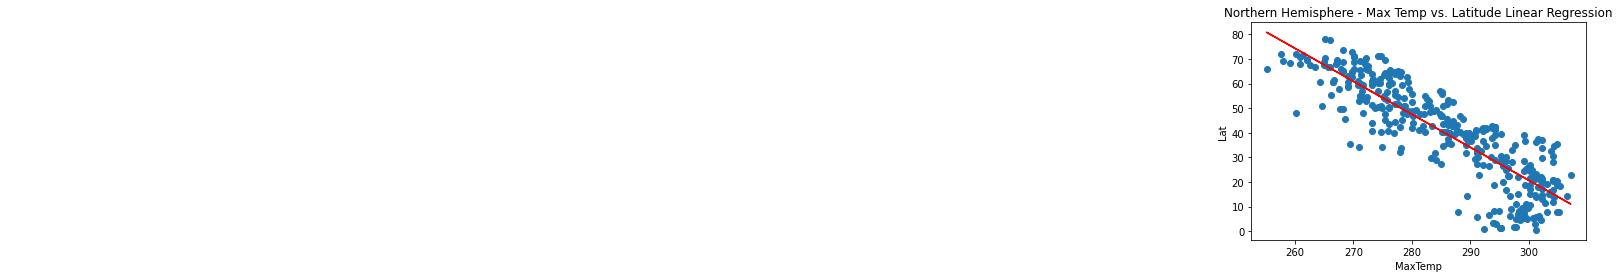

In [301]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('MaxTemp')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Northern - Max Temp Lat")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [294]:
# Perform a linear regression on temperature vs. latitude
#x_values = south['MaxTemp']
#y_values = south['Lat']
city_clean_data.loc[:, ('MaxTemp', 'Lat')]

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress temp'] = regress_values

south

-1.3424701620591721 423.3633226802769 -0.8592746241052742


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN
...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN


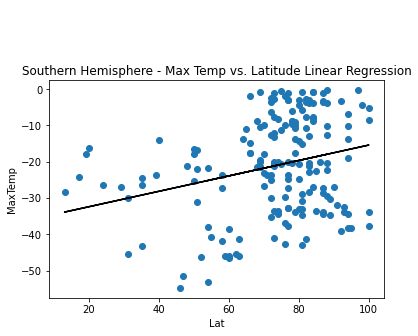

In [299]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='black')

plt.xlabel('Lat')
plt.ylabel('MaxTemp')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Max Temp Lat")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [296]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Humidity']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress hum'] = regress_values

north

0.2885940024906347 18.72199474011428 0.31014700007760565


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress Temp,regress hum
0,Upernavik,72.79,-56.15,269.75,95,88,2.77,61.231996,46.138425
5,Basco,20.45,121.97,302.05,84,100,8.34,17.870210,42.963891
7,Ashcroft,50.72,-121.29,282.15,48,75,3.60,44.585366,32.574507
8,Yumen,40.28,97.20,274.76,70,0,2.65,54.506221,38.923575
9,Pevek,69.70,170.31,271.90,99,95,0.25,58.345686,47.292801
...,...,...,...,...,...,...,...,...,...
534,Greencastle,39.64,-86.86,289.82,82,90,0.81,34.288620,42.386703
536,Naze,28.37,129.48,299.15,88,75,5.10,21.763374,44.118267
537,Panjāb,34.39,67.02,270.90,77,0,2.32,59.688156,40.943733
538,Berezovyy,51.67,135.70,277.57,88,100,0.83,50.733880,44.118267


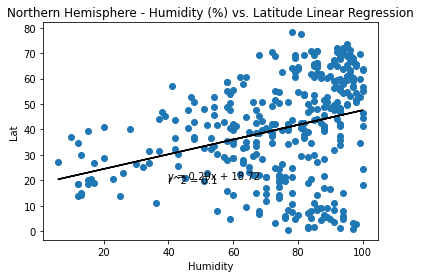

In [297]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='black')

plt.xlabel('Humidity')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='black')
plt.annotate(r_squared, (40, 19), color='black')
plt.savefig("Northern - Humitity Lat")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [298]:
# Perform a linear regression on temperature vs. latitude
x_values = south['Humidity']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress hum'] = regress_values

south

0.21243111232552322 -36.66263188714725 0.26732620940816043


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN,-25.191352
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN,-19.030850
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN,-16.694107
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN,-20.730298
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN,-26.890801
...,...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN,-20.517867
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN,-19.243281
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN,-19.668143
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN,-15.419521


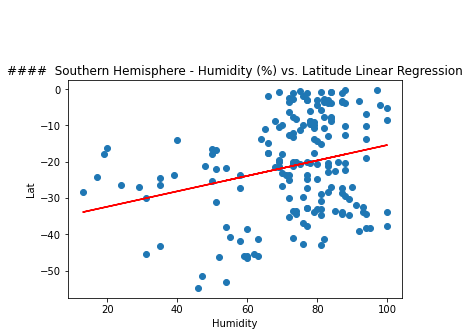

In [278]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Humidity')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Humidity Lat")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [279]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Cloundiness']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress cloud'] = regress_values

north

0.13836161872746155 32.30278708376061 0.2703872308178128


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress tXemp,regress Temp,regress wind,regress cloud
0,Upernavik,72.79,-56.15,269.75,95,88,2.77,61.231996,61.231996,61.231996,39.582436,44.478610
5,Basco,20.45,121.97,302.05,84,100,8.34,17.870210,17.870210,17.870210,44.132203,46.138949
7,Ashcroft,50.72,-121.29,282.15,48,75,3.60,44.585366,44.585366,44.585366,40.260408,42.679908
8,Yumen,40.28,97.20,274.76,70,0,2.65,54.506221,54.506221,54.506221,39.484416,32.302787
9,Pevek,69.70,170.31,271.90,99,95,0.25,58.345686,58.345686,58.345686,37.524013,45.447141
...,...,...,...,...,...,...,...,...,...,...,...,...
534,Greencastle,39.64,-86.86,289.82,82,90,0.81,34.288620,34.288620,34.288620,37.981441,44.755333
536,Naze,28.37,129.48,299.15,88,75,5.10,21.763374,21.763374,21.763374,41.485660,42.679908
537,Panjāb,34.39,67.02,270.90,77,0,2.32,59.688156,59.688156,59.688156,39.214860,32.302787
538,Berezovyy,51.67,135.70,277.57,88,100,0.83,50.733880,50.733880,50.733880,37.997777,46.138949


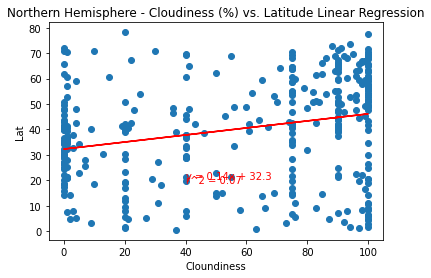

In [280]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Cloundiness')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Northern - Cloundiness Lat")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [281]:
x_values = south['Cloundiness']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress scloud'] = regress_values

south

0.010964308612268887 -21.73206626288496 0.029322707200704977


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress scloud
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN,-25.191352,-20.745278
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN,-19.030850,-21.139994
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN,-16.694107,-21.732066
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN,-20.730298,-21.556637
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN,-26.890801,-20.909743
...,...,...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN,-20.517867,-21.600495
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN,-19.243281,-21.293494
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN,-19.668143,-21.063243
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN,-15.419521,-21.293494


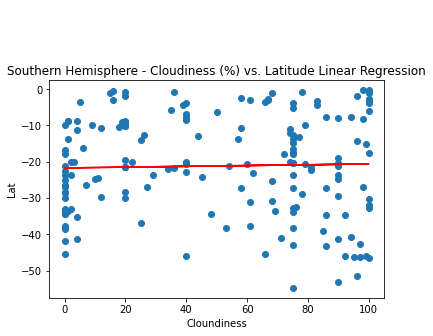

In [282]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Cloundiness')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Cloundiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [283]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Wind Speed']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress wind'] = regress_values

south

0.8168343752884579 37.319804657234805 0.09089547914246807


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress scloud
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN,-25.191352,-20.745278
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN,-19.030850,-21.139994
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN,-16.694107,-21.732066
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN,-20.730298,-21.556637
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN,-26.890801,-20.909743
...,...,...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN,-20.517867,-21.600495
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN,-19.243281,-21.293494
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN,-19.668143,-21.063243
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN,-15.419521,-21.293494


AttributeError: module 'matplotlib.pyplot' has no attribute 'savegfig'

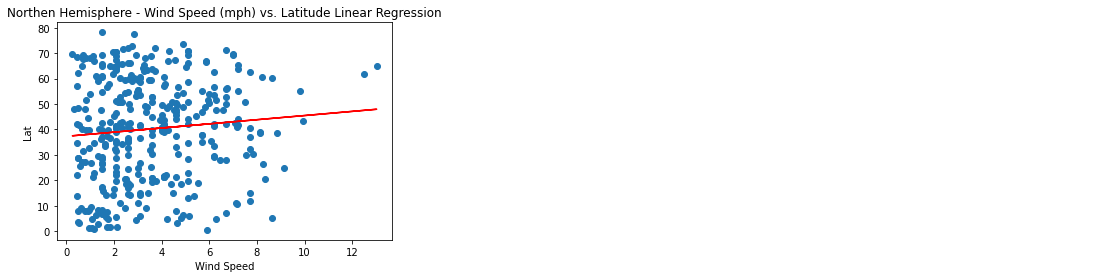

In [284]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northen Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savegfig("North - Wind")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [285]:
# Perform a linear regression on temperature vs. latitude
x_values = south['Wind Speed']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress wind'] = regress_values

south

-0.8323140235417384 -17.99439198596774 -0.1424267459105969


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress scloud,regress wind
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN,-25.191352,-20.745278,-20.574565
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN,-19.030850,-21.139994,-22.239194
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN,-16.694107,-21.732066,-20.940784
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN,-20.730298,-21.556637,-23.346171
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN,-26.890801,-20.909743,-22.738582
...,...,...,...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN,-20.517867,-21.600495,-22.996599
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN,-19.243281,-21.293494,-19.026461
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN,-19.668143,-21.063243,-23.845560
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN,-15.419521,-21.293494,-18.410549


AttributeError: module 'matplotlib.pyplot' has no attribute 'savegfig'

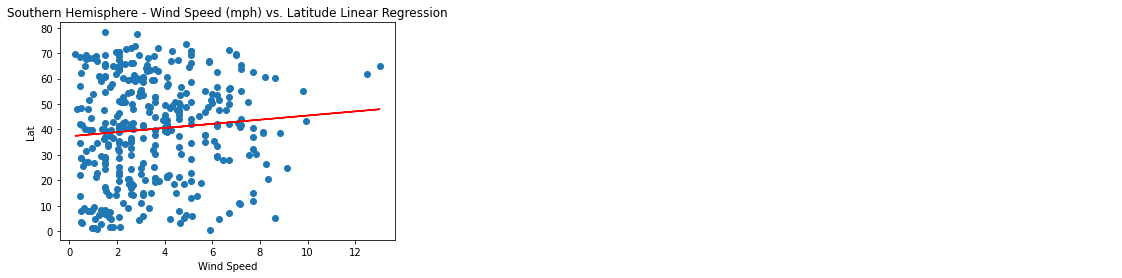

In [276]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savegfig("South - Wind")